# Lab 8 - Optimization Methods: Gradient Descent
## Hudson Arney
### 5 April 2024

  
Descritption: This notebook goes over gradient descent. Here we have implemented an API to do gradient descent and we run experiments with it.  
Experiments include trying out gradient descent on a cubic and quatric function as well as a normal distribution.
---------------------------------------------------------------------------------


## Questions

1. Reflect on the form and organization of our optimizer API. Specifically, discuss each of the methods and what role they serve. This discussion should include what arguments they accept, what the method returns, and why we might choose to separate out these 
specific methods into helper methods. 
    -  The __init__ method takes as arguments step_size, max_iter, tol, and delta. Step_size also known as the learning rate determines how far we should move in the step of the gradient. Max iterations determines how many times we run through this algorithm (one stopping criteria). Tolerance is another form of stopping criteria, if the step is smaller than the tolerance than the qlgorithm should quit as well. Delta is the pertrubation (how much we are adding and then dividing by later) for a numerical derivative. The __init__ method simply saves these values for later use.
    
    - The optimize method is the main method of this class, which takes in a cost function and starting parameters for that cost function and eventually finds parameters the minimize the cost_function.cost method. It does this by computing the gradient of the cost function and then subtracting the gradient multiplied by the step size. If none of the stopping criteria is met it continues to do this until one of them are and then returns the found parameters as well as the number of iterations it took.
    
    - The optimize_with_intermediate_steps is the same as the optimize method, however it also returns intermediate parameter results. This was made for visualisation purposes in the first experiment. This allows us to see how the alogrithm is "walking" towards the extrema.
    
    - The _calculate_change method simply calculates the change between the old and new parameters. It could be used to do the check vs. tolerance, but for readability purposes I showed exactly what the change was and checked that instead.
    
    - The _gradient method was taken directly from the previous labs and was not augmented.
    
    - The _update parameter moves the parameters according to the gradient and step size. It takes as parameters the current param as well as the gradient computed.

________________________________
 
2. For experiment 1:  
    i. how many optima did you find? Hint: Discuss the significance of places where the derivative is equal to 0. 
    - I found two optima, one at 8 and one at -6. This was done by taking the numerical derivative and finding the values closest to 0.

    ii. When you used the optimizer you started at x = 0. How many optima did your optimizer return? Was it a minima or maxima? Was it a global or local optima? 
    - The optimizer only found one optima. It found the optima at 8, which is a global minima, but not the only extrema.

    iii. By looking at the gradient descent algorithm find what term pointed you toward the minimum. Describe how it did this. Can you think of a way to find the function’s maxima? 
    - The gradient descent algorithm term that pointed it towards the minimum was the gradient. The gradient that was returned was always negative in this case and we subtracted that from the parameters, so the parameters were increasing. We were also trying to minimize the gradient. If we wanted to find the maximum we would have to flip that and move in the opposite direction. What this ends up being in code is in the update method instead of subtracting we add. 
    - Original: return param - self.step_size * gradient
    - Gradient ascent: return param + self.step_size * gradient

    Gradient Ascent:
    
    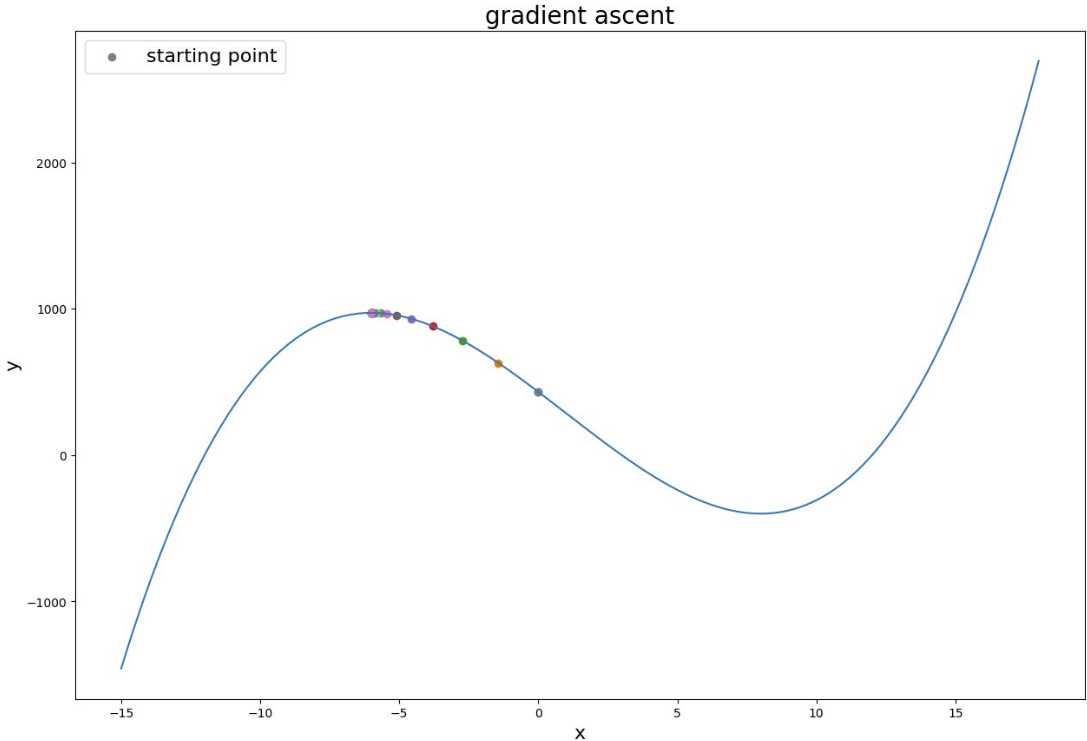


________________________________

3. For experiment 2: 
    i. how many optima did you find?  
    - I found three extrema: 
        - Extrema at: -0.6500000000000501   
        - Extrema at: -0.010000000000063736   
        - Extrema at: 4.639999999999837  

    ii. Describe the different starting locations that you used to solve for optima. Was   
    the found optima different for any of these starting locations and were they the   
    global or local optima? If it was, can you explain why the optimizer found   
    different solutions?   
    - The optimizer found two of three extrema. It found both minima, but did not find the maxima. This is because the algorithm we used is designed to find minima and not maxima. If we added to the parameters we would find the maxima.  6, 3, -2  The starting points of 6 and 3 both found the global minimum at 4.64. The starting point -2 found the local minimum at -0.65.  Neither found the maximum at 0.  

________________________________

4. For experiment 3:  
    
    i. how many optima did you find?  
    - I found one optima
    
    ii. Look back at the heatmaps you generated in Lab06 for the gaussian distribution. 
    - In the heatmaps from lab 6 we saw a visualization of the cost function space.
    - Since we are trying to minimize the error we are trying to go from bright colors to dark colors. 
    
    Describe what the optimizer is doing using the heatmap visualization.
    - If you think of the cost function space like a mountainous region, the optimizer is plopped down on the side of  
    the mountain and its job is to find the fastest path down to the base of the mountain. Since there are trees all around the optimizer can't see very far and goes the path that leads downwards. It may be lead to a local optima, but it follows the path anyways. In the case of our gaussian model, the cost function is convex and continuous meaning it will find the global minimum, which is what   
    we want.  

________________________________

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from optim import Optimizer
from cost_functions import GaussianCostFunction

def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
        
    return ax

## Experiment 1 - Cubic Model

### Experiment 1 - part 1

<Axes: title={'center': 'Cubic Function'}, xlabel='x samples', ylabel='f(x)'>

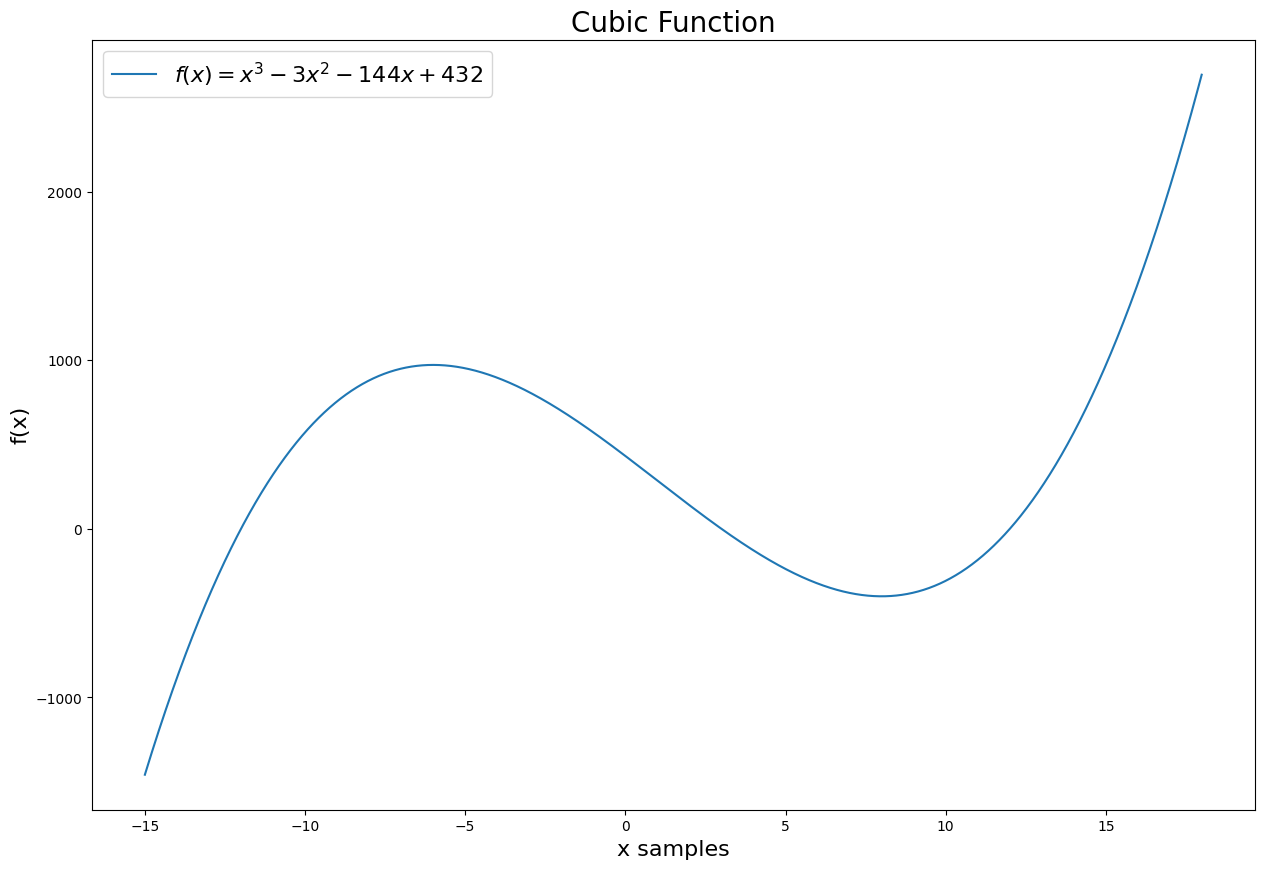

In [99]:
from cProfile import label


x_samples = np.arange(start=-15, stop=18, step=0.01)
func1 = lambda x : x**3 - 3*x**2 - 144*x + 432

y_samples = func1(x_samples)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x_samples, y_samples, label='$f(x)=x^3 - 3x^2 - 144x + 432$')
make_pretty(ax, 'Cubic Function', 'x samples', 'f(x)')

### It seems to have a minima at 8 and a maxima at -6

### Experiment 1 - Part 2

<Axes: title={'center': 'Derivative of Cubic Function'}, xlabel='x samples', ylabel='y samples'>

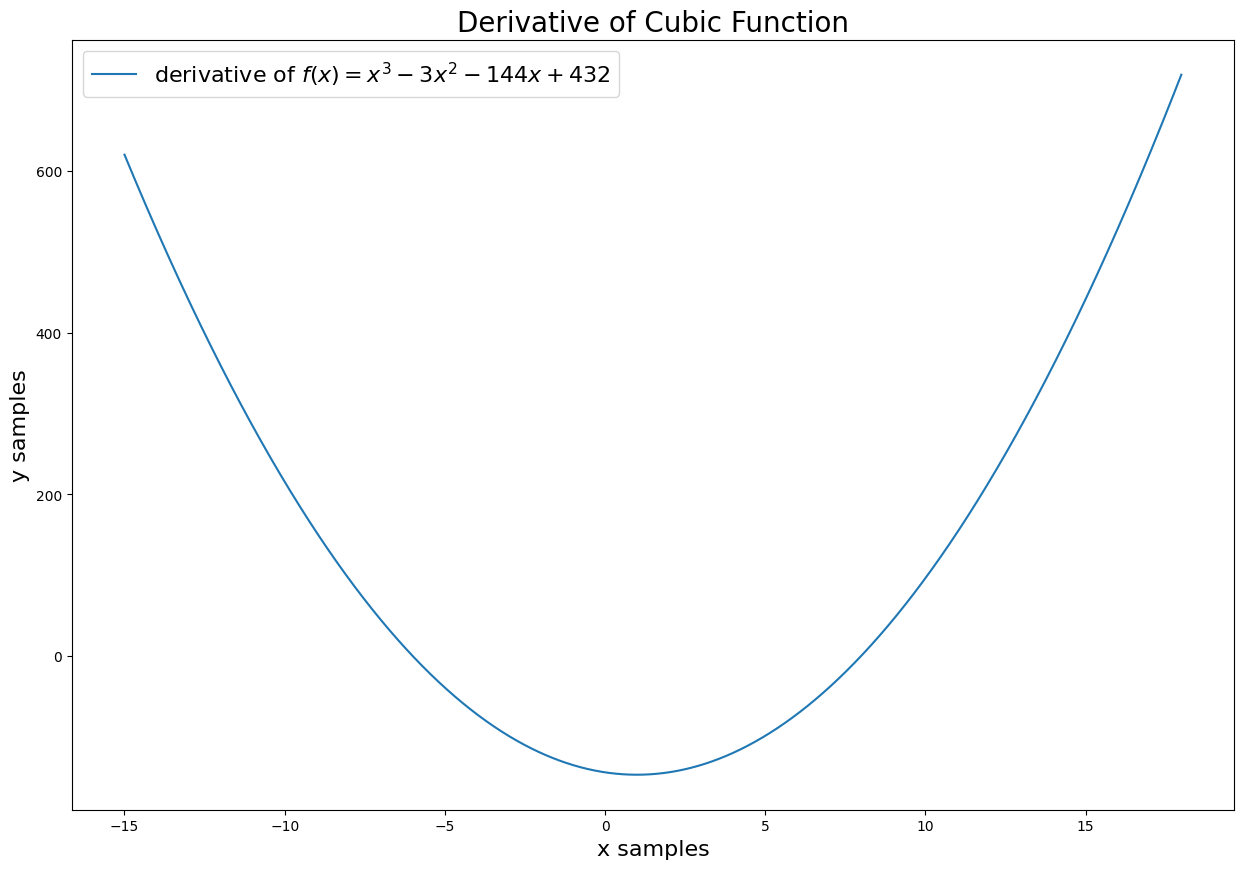

In [100]:
num_deriv = lambda x : (func1(x + 0.01) - func1(x)) / 0.01

y = num_deriv(x_samples)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x_samples, y, label='derivative of $f(x)=x^3 - 3x^2 - 144x + 432$')
make_pretty(ax, 'Derivative of Cubic Function', 'x samples', 'y samples')

In [101]:

y_abs = np.abs(y)
idx = np.argsort(y_abs)
print(f'Best 5 indices: {idx[0:5]}')
print(f'Lowest x values: {y_abs[idx[0]]}, {y_abs[idx[1]]}')
print(f'Corresponding x samples: {x_samples[idx[0]]}, {x_samples[idx[1]]}')

Best 5 indices: [ 900 2299 2300  899  901]
Lowest x values: 0.2098999999930129, 0.20990000003848763
Corresponding x samples: -6.000000000000192, 7.989999999999512


### Experiment 1 - part 3

In [102]:
class CubicCostFunction:
    
    def cost(self, feature):
        func1 = lambda x : x**3 - 3*x**2 - 144*x + 432
        return func1(feature)
    

### Experiment 1 - part 4 and 5

In [103]:
opt = Optimizer(step_size=0.01, max_iter=100, tol=1e-5, delta=1e-4)
cost_func = CubicCostFunction()
solve = opt.optimize(cost_func, np.array([0.0]))
ans = opt.optimize_with_intermediate_results(cost_func, np.array([0.0]))


In [104]:
print(f'Solved minima: {solve[0]}\nNumber of Epochs: {solve[1]}')


Solved minima: [7.99992719]
Number of Epochs: 26


<Axes: title={'center': 'gradient descent'}, xlabel='x', ylabel='y'>

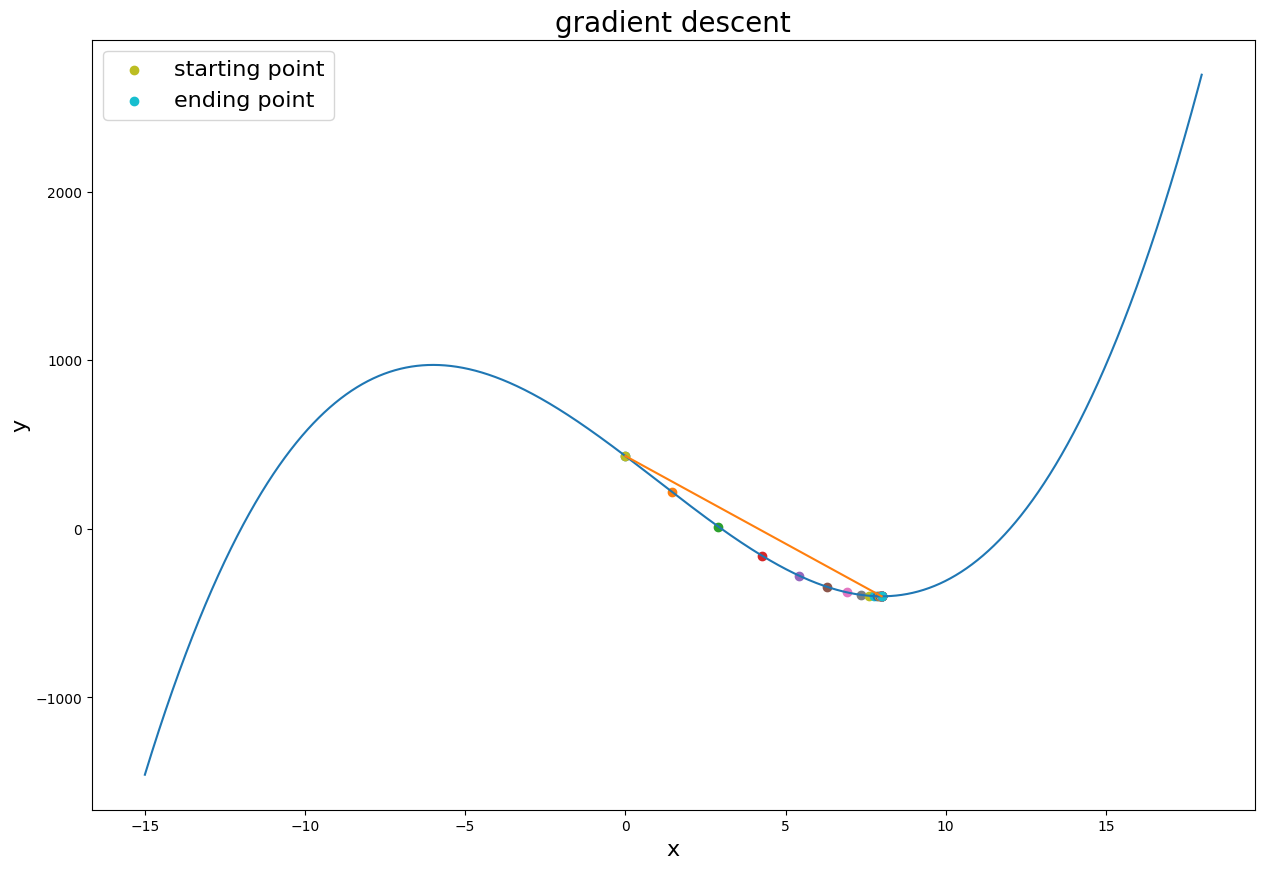

In [105]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x_samples, y_samples)
idx = 0
for val in ans[2]:
    ax.scatter(val[0], func1(val[0]))
    idx += 1
ax.scatter(0, func1(0), label='starting point')
ax.scatter(7.99993677, func1(7.99993677), label='ending point')

x_line = [0, 7.99993677]
y_line = [func1(0), func1(7.99993677)]
ax.plot(x_line, y_line)
make_pretty(ax, 'gradient descent', 'x', 'y')

## Experiment 2

### Experiment 2 - part 1

In [106]:
x_samples = np.arange(start=-3, stop=6.75, step=0.01)
func2 = lambda x : 3*x**4 - 16*x**3 - 18*x**2 

pred = func2(x_samples)

<Axes: title={'center': 'Quartic Function'}, xlabel='x samples', ylabel='f(x)'>

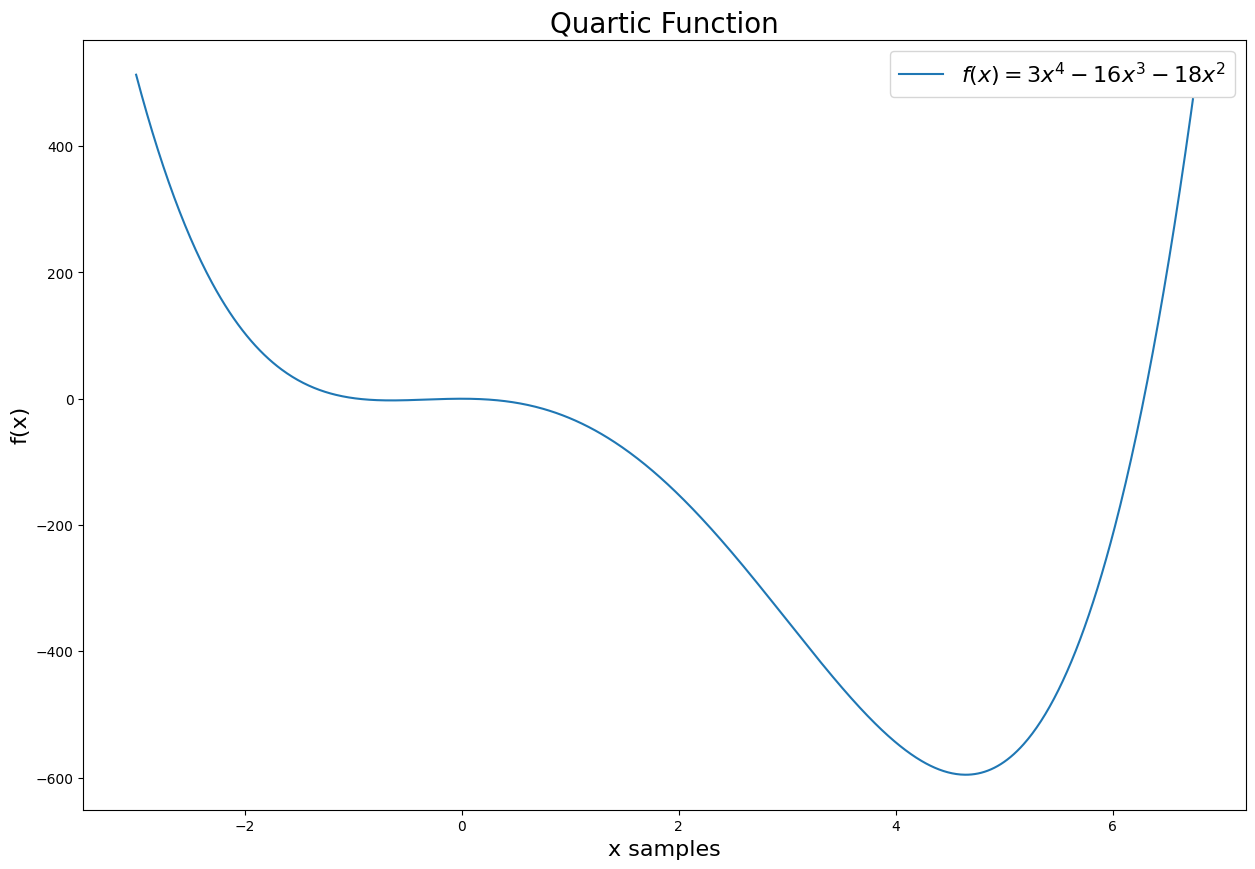

In [107]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x_samples, pred, label='$f(x)=3x^4 - 16x^3 - 18x^2$')
make_pretty(ax, 'Quartic Function', 'x samples', 'f(x)')

### Experiment 2 - part 2

<Axes: title={'center': 'Derivative of Quartic Function'}, xlabel='x samples', ylabel='y samples'>

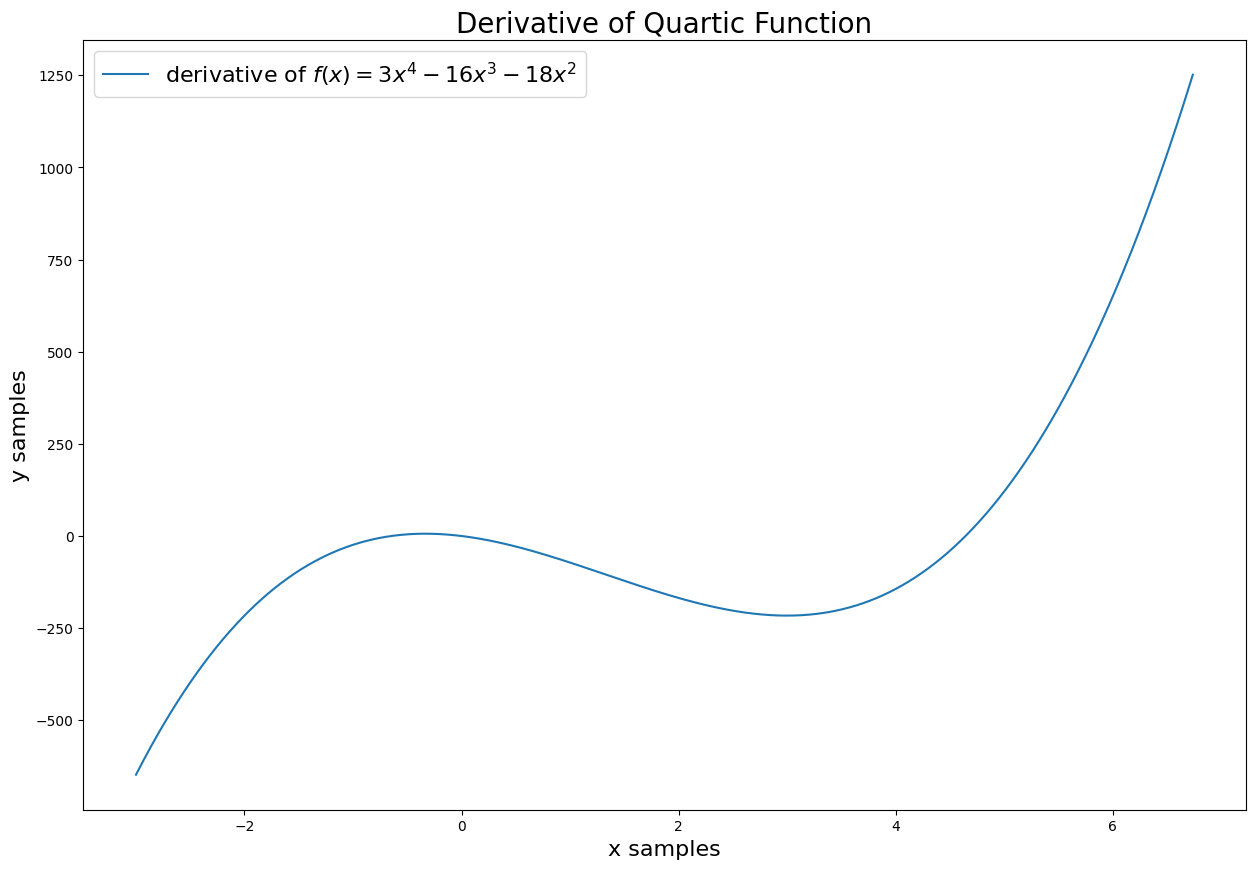

In [108]:
num_deriv2 = lambda x : (func2(x + 0.001) - func2(x)) / 0.001
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x_samples, num_deriv2(x_samples), label='derivative of $f(x)=3x^4 - 16x^3 - 18x^2$')
make_pretty(ax, 'Derivative of Quartic Function', 'x samples', 'y samples')

In [109]:
pred = num_deriv2(x_samples)
pred_abs = np.abs(pred)
idx = np.argsort(pred_abs)

In [110]:
print(f'Extrema at: {x_samples[235]}')
print(f'Extrema at: {x_samples[299]}')
print(f'Extrema at: {x_samples[764]}')

Extrema at: -0.6500000000000501
Extrema at: -0.010000000000063736
Extrema at: 4.639999999999837


### Experiment 2 - part 3

In [111]:
class QuarticCostFunction:
    
    def cost(cost_func, param):
        func2 = lambda x : 3*x**4 - 16*x**3 - 18*x**2 
        return func2(param)

### Experiment 2 - part 4 and 5

In [112]:
opt = Optimizer(0.001, 1000, 1e-5, 1e-4)
ret1 = opt.optimize(QuarticCostFunction(), np.array([6.0]))
ret2 = opt.optimize(QuarticCostFunction(), np.array([3.0]))
ret3 = opt.optimize(QuarticCostFunction(), np.array([-2.0]))
print(f'Results:\n First: {ret1}\n Second: {ret2}\n Third: {ret3}')

Results:
 First: (array([4.64572862]), 29)
 Second: (array([4.64567372]), 35)
 Third: (array([-0.64604084]), 175)


<Axes: title={'center': 'Gradient Descent Quartic Model'}, xlabel='x', ylabel='y'>

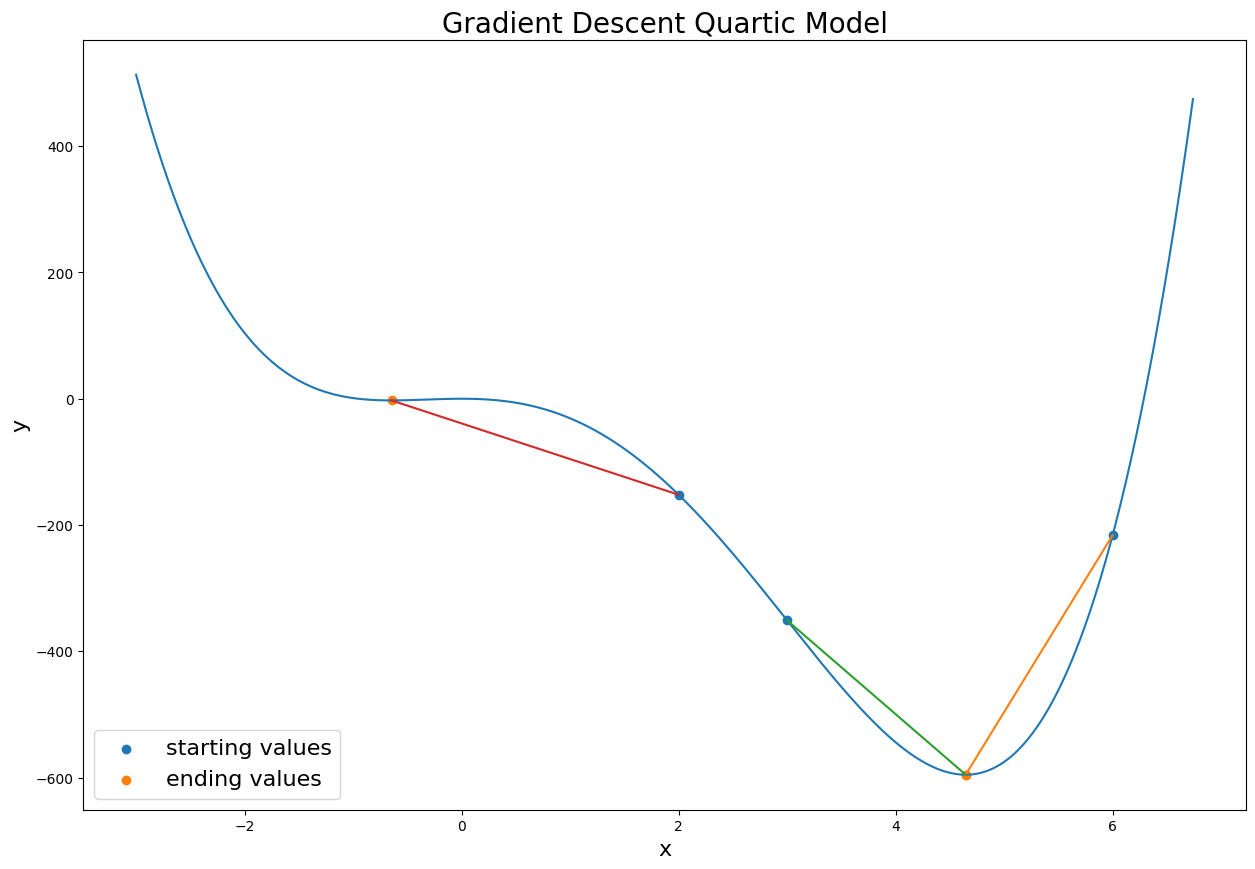

In [113]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x_samples, func2(x_samples))
starting_x = [6, 3, 2]
starting_y = [func2(x) for x in starting_x]
ending_x = [4.64572, 4.64568186, -0.64603101]
ending_y = [func2(x) for x in ending_x]


ax.scatter(starting_x, starting_y, label='starting values')
ax.scatter(ending_x, ending_y, label='ending values')
ax.plot((starting_x[0], ending_x[0]), (starting_y[0], ending_y[0]))
ax.plot((starting_x[1], ending_x[1]), (starting_y[1], ending_y[1]))
ax.plot((starting_x[2], ending_x[2]), (starting_y[2], ending_y[2]))
make_pretty(ax, 'Gradient Descent Quartic Model', 'x', 'y')

## Experiment 3

### Experiment 3 - part 1

In [114]:
gauss_path = 'gaussdist.csv'

df = pd.read_csv(gauss_path, header=None)
print(df.columns)
df.head()

Index([0, 1], dtype='int64')


,0,1
0,6.99,0.156842
1,8.90,0.007897
2,9.58,0.001551
3,5.46,0.318990
4,1.38,0.001396


<Axes: title={'center': 'prediction vs actual vs starting'}, xlabel='x', ylabel='y'>

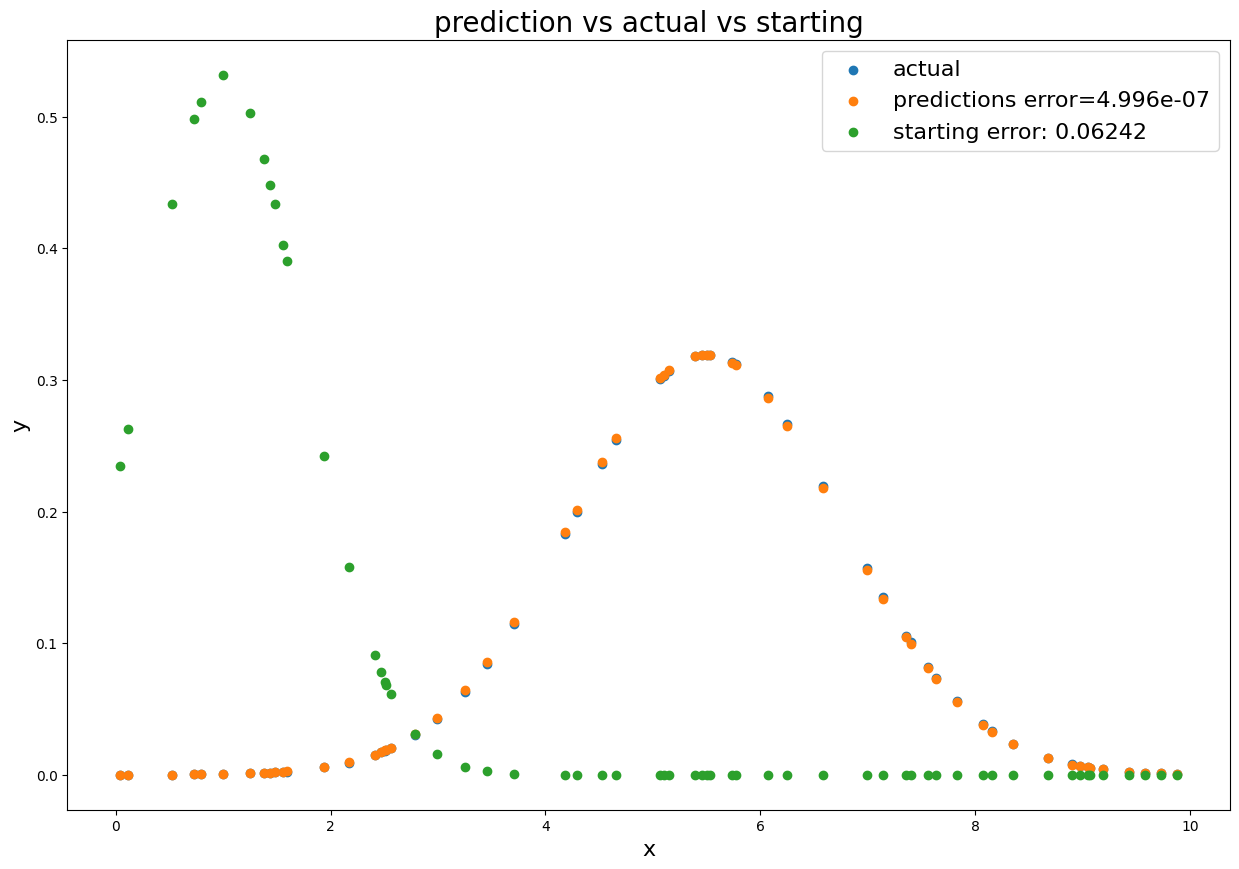

In [115]:
gcf = GaussianCostFunction(df[0].values, df[1].values)
opt = Optimizer(1, 5000, 1e-4, 1e-3)
params = opt.optimize(gcf, [1, 0.75])

pred = gcf.predict(df[0], params[0])
cost_gd = gcf.cost(params[0])
cost_before = gcf.cost([1, 0.75])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(df[0], df[1], label=f'actual')
ax.scatter(df[0], pred, label=f'predictions error={round(cost_gd,10)}')
ax.scatter(df[0], gcf.predict(df[0], [1, 0.75]), label=f'starting error: {round(cost_before,5)}')
make_pretty(ax, 'prediction vs actual vs starting', 'x', 'y')

